In [14]:
%matplotlib inline

# Classifying on shots features using Random Forest

In [2]:
import numpy as np
import pandas as pd

## Load data

In [6]:
df = pd.read_csv('../features/shots/shots_metadata.csv')
df.set_index('filename', inplace=True)
df.head()

,has_text,nb_faces_max,nb_shots
filename,,,
Aabbey1-InvitationToSummer2009RabbinicalStudySeminarAtHartmanIn262,True,0,1
Aabbey1-RachelSabathBeitHalachmiThreeModelsOfTorahOnCelebrating136,True,1,2
Aabbey1-ShalomHartmanInstitutesInnovativeTheologyConference661,True,1,5
Acnethai-414,False,1,2
Acnethai-EP4HowToMakeUpForAcneFromBobbiBrown565,True,0,7


## Classifying

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier



clf = RandomForestClassifier()

df['tag'] = pd.read_csv('../features/tags.csv', index_col=0)['tag_name']

y = df['tag']

X = df.drop('tag', axis=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Precision score


In [22]:
from sklearn import metrics

precision = metrics.precision_score(y_test, y_pred, average='micro')
recall = metrics.recall_score(y_test, y_pred, average='micro')
print('Précision : {}\nRappel : {}'.format(precision, recall))

Précision : 0.24347826086956523
Rappel : 0.24347826086956523


## Confusion matrix

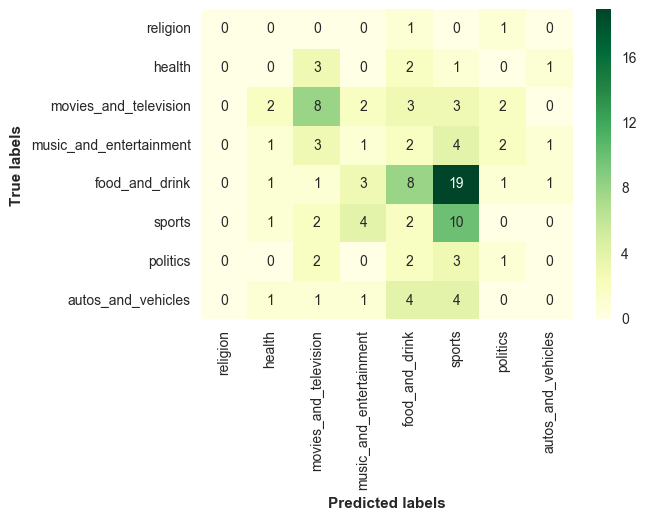

In [19]:
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=y.unique(), yticklabels=y.unique(), cmap='YlGn')
ax.set_xlabel('Predicted labels', fontweight='bold')
ax.set_ylabel('True labels', fontweight='bold')